In [7]:
from pydub import AudioSegment
from pydub.utils import make_chunks

from pydub.silence import detect_nonsilent
import pandas as pd

import librosa
import matplotlib.pyplot as plt
import librosa.display

import noisereduce as nr


In [1]:
# Use this script to test and find the best silence lens and threshold
# Splices fragment of audio file
#TODO https://stackoverflow.com/questions/59102171/getting-timestamps-from-audio-using-python
#TODO add directory



#Input directory example
#/Users/michael/Desktop/test_demo.m4a

audio_path = input("Input audio path") #path refers to the file
loaded_audio = AudioSegment.from_file(audio_path, format="m4a")

#Parameters
predefined_ms = 120 * 1000 # pydub calculates in millisec

#Determine whether to splice first or last seconds of audio
spliced_test_audio = loaded_audio[:predefined_ms] 
#spliced_test_audio = loaded_audio[-predefined_ms:] 

#Export spliced sample audio
spliced_test_audio.export("TEST.wav", format="wav")# Use this script to test and find the best 
print("Audio successfully spliced")


Audio successfully spliced


In [4]:
#Use this to adjust parameters. Check if the start and stop times correspond with wave plot.

#Convert test wav to audio_segment
audio_segment = AudioSegment.from_wav("test_sample.wav")

#Convert seconds into timestamp
def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds) 

#adjust target amplitude
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

#normalize audio_segment to -20dBFS 
normalized_sound = match_target_amplitude(audio_segment, -20.0)
audio_length = len(normalized_sound)/1000 #required for plotting wave graph
print("length of audio_segment={} seconds".format(len(normalized_sound)/1000))

#Print detected non-silent chunks, which in our case would be spoken words.
#the lower the silence threshold (higher negative number), the less senstive it is
nonsilent_data = detect_nonsilent(normalized_sound, min_silence_len=4000, silence_thresh=-32, seek_step=1)

#convert ms to seconds
print("start,Stop")
for chunks in nonsilent_data:
    print([convert(chunk/1000) for chunk in chunks])
 

  


length of audio_segment=44.756 seconds
start,Stop
['0:00:00', '0:00:12']
['0:00:17', '0:00:21']
['0:00:28', '0:00:33']
['0:00:39', '0:00:44']


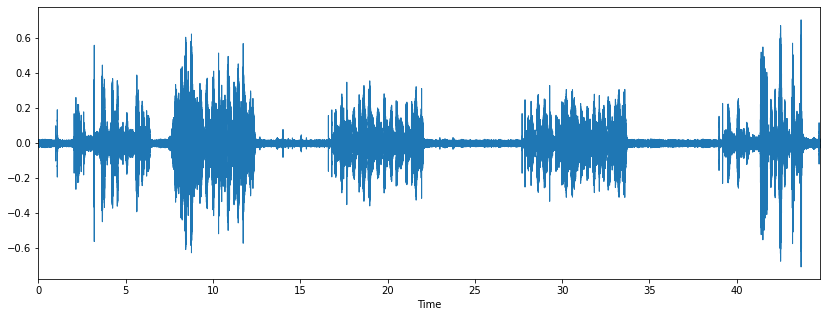

In [5]:
#Graphs the sample audio. Used to see if the silence parameters are acceptable
#ALso use


#Plots the sample test audio
test_dir = "test_sample.wav"
audio_data, sampling_rate = librosa.load(test_dir)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_data, sr=sampling_rate)



Recover signal:  86%|████████▌ | 6/7 [00:00<00:00,  9.31it/s]

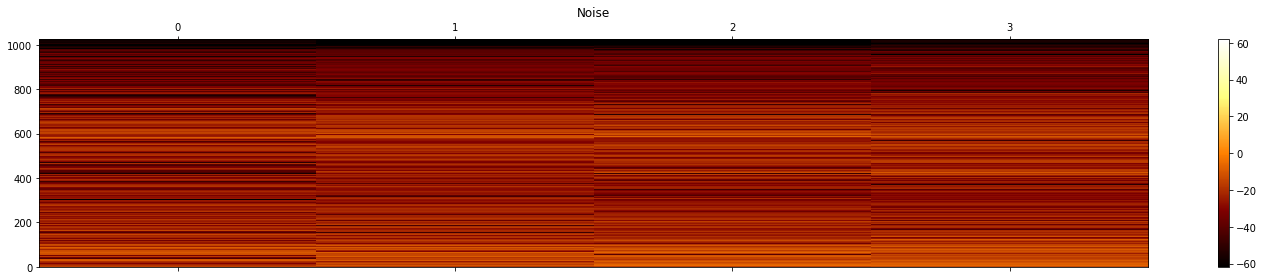

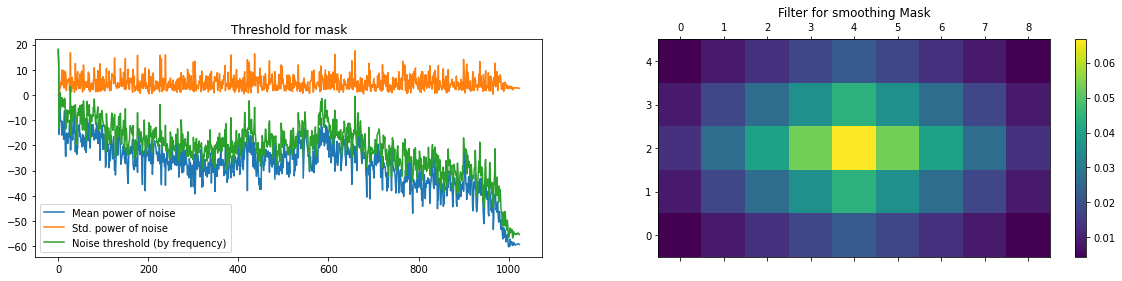

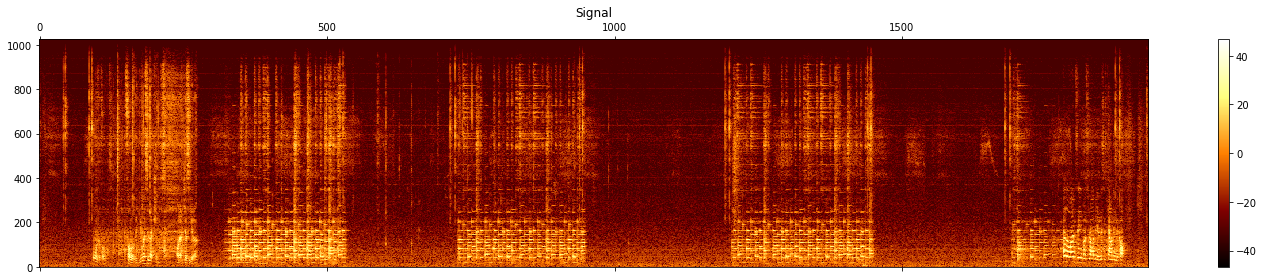

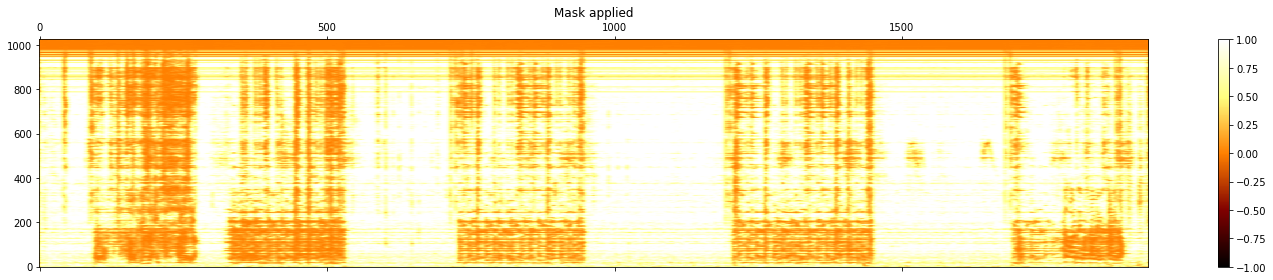

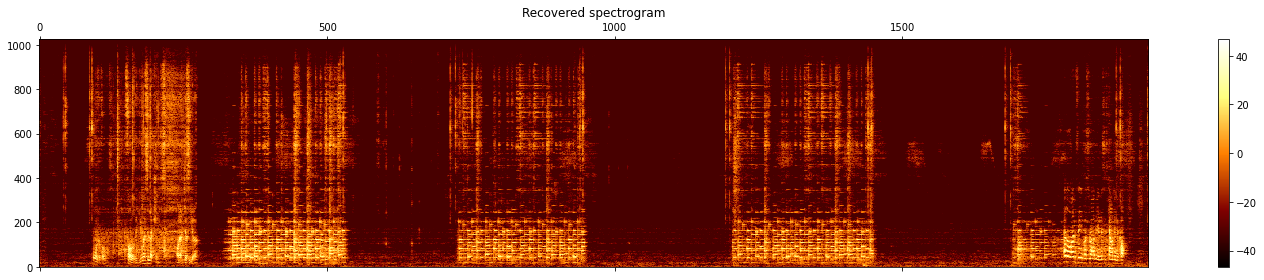

Recover signal: 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]


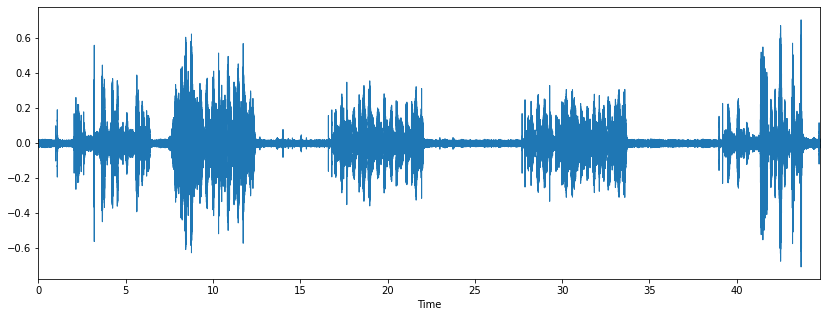

In [8]:
# Reduces noise and graphs the sample. Compare this graph above to see if its acceptable.

noisy_part = audio_data[8000:10000]
# perform noise reduction
reduced_noise = nr.reduce_noise(audio_clip=audio_data,
noise_clip=noisy_part, verbose=True)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_data, sr=sampling_rate)


